# Analise de dados financeiros governamentais.
Principais objetivos:

Principais objetivos:
1. Em que ano o país teve um alto crescimento do PIB Per Capita?
2. Qual ano teve as maiores despesas com saúde?
3. Qual ano teve os maiores gastos com educação?
4. Como a receita do governo se correlaciona com a despesa do governo?
5. Como a educação e a saúde se correlacionam com o crescimento do PIB?
6. Como os gastos do governo com educação e saúde afetam o crescimento do PIB?
7. Com base na análise quais são as recomendações aos governantes e ges39ef26


O dataset utilizado foibilizado por onibior uma api fornecida pelo banco mundial.
http://api.worldbank.org/v2/en/countrydo pelo

In [ ]:
#!pip install openpyxl
import openpyxl

In [14]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.linear_model import LinearRegression

## Carregando e Compreendendo os Dados

In [16]:
# Carrega o dataset
dados_egov = pd.read_excel('dados/dataset.xlsx')

In [17]:
# Shape
dados_egov.shape

(17, 16)

In [18]:
# Visualiza os dados
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.85074,25.437891,24.98009,5.169123,NaN,NaN,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2004,23.40954,27.526983,26.66815,5.344949,NaN,NaN,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2005,NaN,30.960957,27.46934,5.314364,NaN,NaN,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000
3,2006,21.67777,40.938290,25.08140,5.873449,NaN,NaN,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000
4,2007,NaN,50.321873,NaN,5.997067,NaN,NaN,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000


## Análise Exploratória

In [19]:
# Tipos de dados
dados_egov.dtypes

ano_coleta                        int64
despesas_educ_percent           float64
despesas_saude_per_capita       float64
despesas_educ_total             float64
despesas_saude_%pib             float64
receita_trib_%pib               float64
receita_excl_doa_%pib           float64
ibrd_e_ida                      float64
pop_cresc_anual%                float64
pib_cresc_per_capita_%pib       float64
pib_deflator                    float64
domestic_saude_despesas_%pib    float64
pib_cresc_anual%                float64
pib_cor_us$                     float64
despesa_nac_bruta_%pib          float64
pib_moeda_local                   int64
dtype: object

In [20]:
# Resumo estatístico
dados_egov.describe()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
count,17.000000,8.000000,15.000000,13.000000,15.000000,5.000000,5.000000,1.600000e+01,17.000000,17.000000,17.000000,15.000000,17.000000,1.700000e+01,17.000000,1.700000e+01
mean,2011.000000,34.776599,55.265036,20.844645,5.555868,16.008023,21.028661,3.667159e+09,2.606996,2.539702,117.186747,1.754343,5.247425,4.851720e+10,112.318030,4.387753e+12
std,5.049752,10.632141,17.077696,3.828826,0.412144,0.677579,0.944677,9.532678e+08,0.172462,1.798253,46.934509,0.249802,1.809246,2.477595e+10,2.112360,2.776122e+12
min,2003.000000,20.850740,25.437891,16.664660,4.802543,15.085142,19.620423,2.663224e+09,2.271902,-2.503373,51.824235,1.416008,0.232283,1.490452e+10,109.212364,1.131782e+12
25%,2007.000000,22.976598,45.630081,17.708700,5.266875,15.637825,20.616187,2.946771e+09,2.491937,2.283178,77.789734,1.522404,4.805697,3.195820e+10,110.429285,2.151349e+12
50%,2011.000000,41.763410,57.387424,19.252830,5.519421,16.183533,21.199592,3.313021e+09,2.693733,3.045012,113.111372,1.771546,5.718507,4.195343e+10,112.164729,3.725918e+12
75%,2015.000000,42.682555,69.282478,24.980090,5.935258,16.256635,21.738908,4.244785e+09,2.739229,3.346252,154.710423,1.950641,6.108264,6.400775e+10,114.066709,6.284185e+12
max,2019.000000,43.124180,76.610321,27.469340,6.116753,16.876979,21.968194,5.801797e+09,2.768560,5.494077,192.904792,2.148430,8.405699,9.550309e+10,116.218812,9.740360e+12


In [21]:
# Verificando valores ausentes
dados_egov.isnull().sum()

ano_coleta                       0
despesas_educ_percent            9
despesas_saude_per_capita        2
despesas_educ_total              4
despesas_saude_%pib              2
receita_trib_%pib               12
receita_excl_doa_%pib           12
ibrd_e_ida                       1
pop_cresc_anual%                 0
pib_cresc_per_capita_%pib        0
pib_deflator                     0
domestic_saude_despesas_%pib     2
pib_cresc_anual%                 0
pib_cor_us$                      0
despesa_nac_bruta_%pib           0
pib_moeda_local                  0
dtype: int64

In [ ]:
#Limpeza e processaamento dos dados

### Tratamento de Valores Ausentes com Backfilling e Interpolação

In [ ]:
# Limpando valores ausentes através de backfilling e interpolação
dados_egov['receita_trib_%pib'].fillna(method = 'bfill', inplace = True)
dados_egov['receita_excl_doa_%pib'].fillna(method = 'bfill', inplace = True)
dados_egov = dados_egov.interpolate()

In [23]:
# Verificando valores ausentes
dados_egov.isnull().sum()

ano_coleta                      0
despesas_educ_percent           0
despesas_saude_per_capita       0
despesas_educ_total             0
despesas_saude_%pib             0
receita_trib_%pib               0
receita_excl_doa_%pib           0
ibrd_e_ida                      0
pop_cresc_anual%                0
pib_cresc_per_capita_%pib       0
pib_deflator                    0
domestic_saude_despesas_%pib    0
pib_cresc_anual%                0
pib_cor_us$                     0
despesa_nac_bruta_%pib          0
pib_moeda_local                 0
dtype: int64

In [24]:
# Shape
dados_egov.shape

(17, 16)

In [26]:
# Vamos remover a coluna gdp em US$ uma vez que já o temos na moeda local.
dados_egov = dados_egov.drop(columns = ['pib_cor_us$'])

In [27]:
# Shape
dados_egov.shape

(17, 15)

In [28]:
# Arrendodamos os valores das colunas decimais para 4 casas decimais
dados_egov = dados_egov.round(4)

In [29]:
# Visualiza os dados
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


In [30]:
# Salvamos o dataset limpo
dados_egov.to_csv('dados/dataset_limpo.csv', index = False)

## Análise de Dados

In [31]:
# Carregando o dataset limpo
df = pd.read_csv('dados/dataset_limpo.csv')

## <font color = "red">1- Em Que Ano o País Teve um Alto Crescimento do PIB Per Capita?</font>

In [34]:
# Visualiza os dados
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


In [48]:
#Filtrando o resultado e trasendo o registro completo do dataset
ano = df[(df['pib_cresc_per_capita_%pib'] == df['pib_cresc_per_capita_%pib'].max())]['ano_coleta']

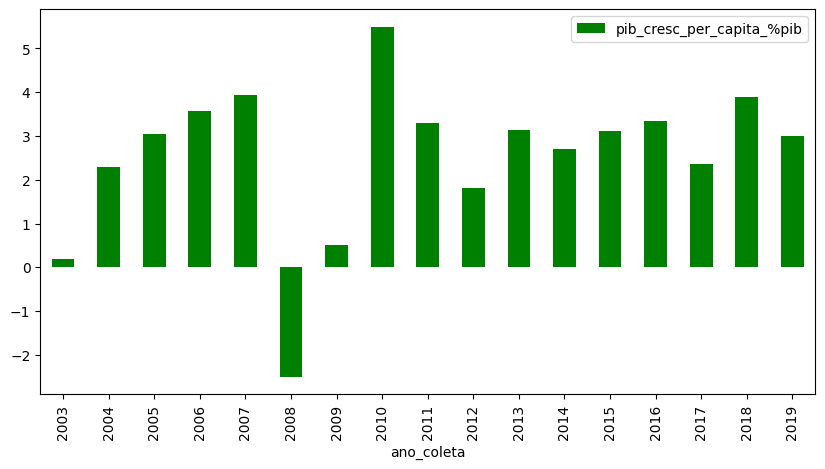

In [53]:
#Apresentando o resultado a analise com um grafico de barras.
resp1 = df.plot( x = 'ano_coleta', y = ['pib_cresc_per_capita_%pib'] ,kind = 'bar' , figsize = (10,5), color = 'green', )
plt.show()

## <font color = "red">2- Qual Ano Teve as Maiores Despesas com Saúde?</font>

In [60]:
# Visualiza os dados
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


In [61]:
#Calculando o gasto nacional bruto em relação ao PIB na moeda local
df['gasto_nac_bruto'] = df['despesa_nac_bruta_%pib'] / 100 * df['pib_moeda_local']

In [63]:
df['desp_saude_bruto'] = df['domestic_saude_despesas_%pib'] / 100 * df['gasto_nac_bruto']

In [67]:
maior_saude  = df[(df['desp_saude_bruto'] == df['desp_saude_bruto'].max())]
maior_saude

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,desp_saude_bruto
16,2019,41.7637,76.6103,19.104,4.8025,15.0851,19.6204,5.801797e+09,2.2719,2.9989,192.9048,2.0526,5.3657,112.9505,9740360000000,1.100179e+13,2.258226e+11


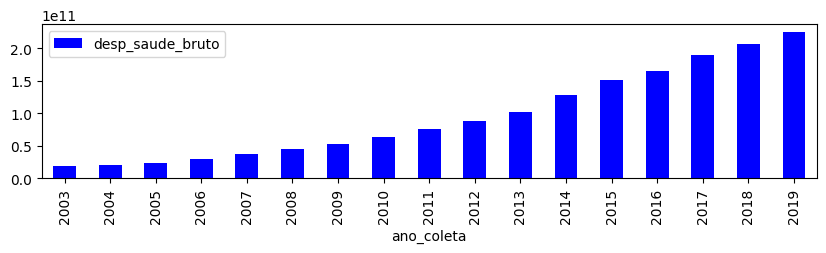

In [68]:
resp3 = df.plot(x = 'ano_coleta', y = ['desp_saude_bruto'], kind = 'bar', figsize = (10,2), color = 'blue')
plt.show()

## <font color = "red">3- Qual Ano Teve os Maiores Gastos com Educação?</font>

In [69]:
# Visualiza os dados
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,desp_saude_bruto
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,1.882185e+10
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,1.991160e+10
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,2.318016e+10
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12,2.965976e+10
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12,3.681230e+10


In [74]:
df['gasto_total_educ'] = df['despesas_educ_total'] /100  *  df['gasto_nac_bruto']

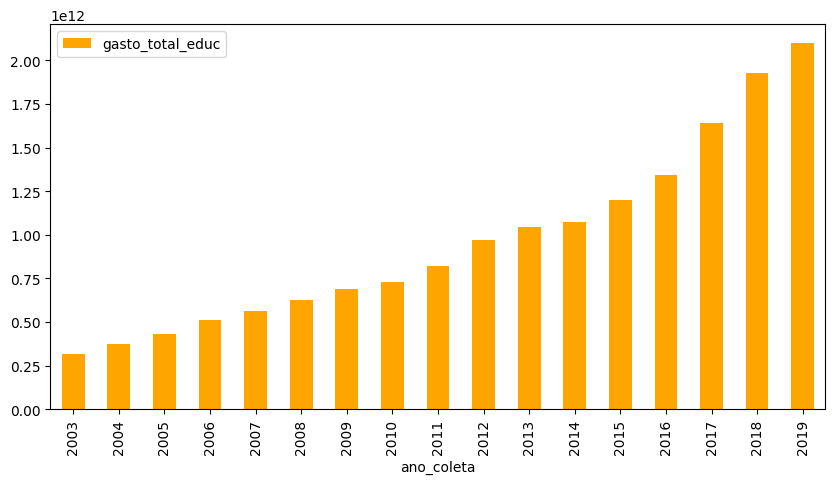

In [75]:
resp3 = df.plot(x = 'ano_coleta', y = 'gasto_total_educ', kind = 'bar', figsize = (10,5), color = 'orange')
plt.show()

## <font color = "red">4- Como a Receita do Governo se Correlaciona com a Despesa do Governo?</font>

In [76]:
# Visualiza os dados
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,desp_saude_bruto,gasto_total_educ
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,1.882185e+10,3.158907e+11
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,1.991160e+10,3.750046e+11
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,2.318016e+10,4.294482e+11
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12,2.965976e+10,5.100503e+11
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12,3.681230e+10,5.664704e+11


<Axes: >

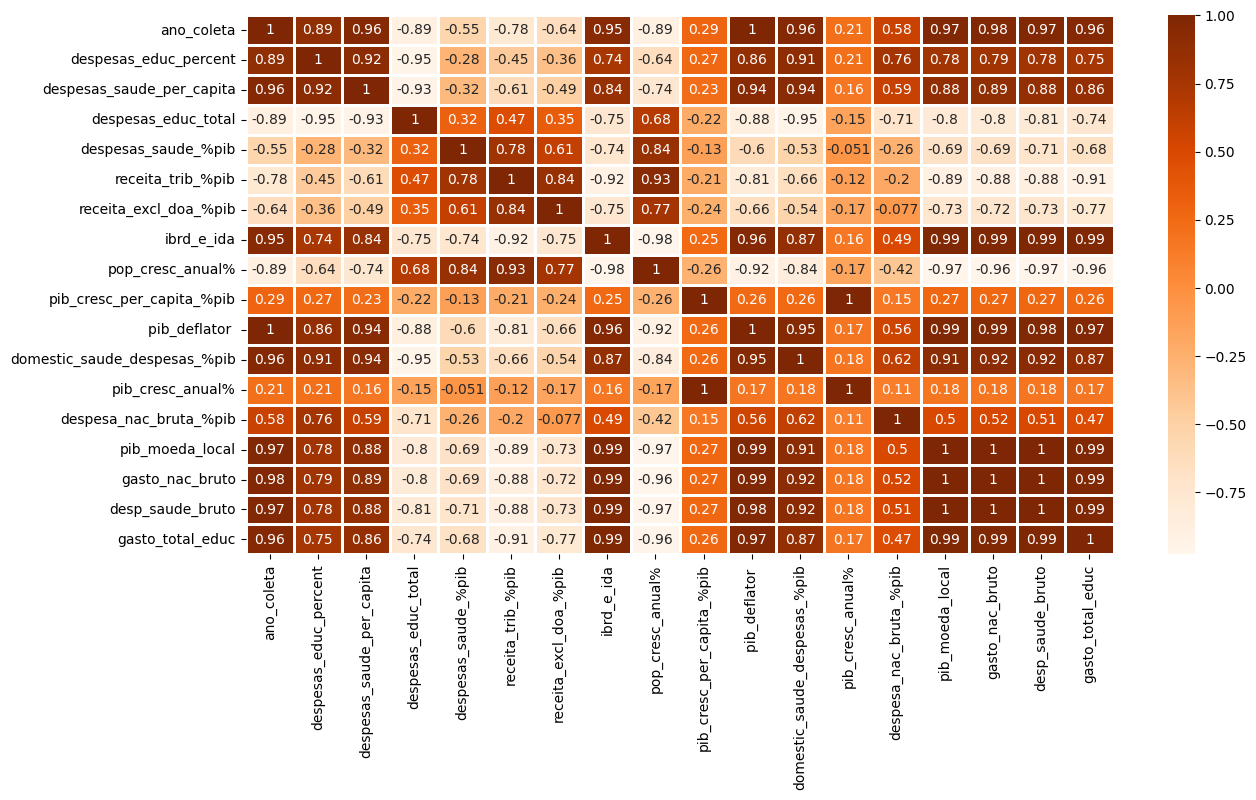

In [84]:
#Calcula a correlação
df2 = df.corr(method='pearson')
df2

#define o tamanho do gráfico
plt.figure(figsize=(14,7))


#Visualiza a correlação em um mapa de calor.
sb.heatmap(df2,
           xticklabels=df2.columns,
           yticklabels=df2.columns,
           cmap='Oranges',
           annot=True,
           linewidths=0.8)


### A partir dos coeficientes da correlação acima, obtemos as seguintes informações:
#  Receita de importos:
    * Despesas com saúde (desp_saude_%pib) tem uma forte correlação com a receita tributária do governo (receita_trib_%pib) .
    O coeficiente de correlação é de +0,78 o que indica que eles são diretamente proporcionais.

    * Despesas com educação tem uma boa correlação com a receita tributária. O coeficiente de correlação é +0,47 , o que indica que são diretamente             proporcionais, mas não da mesma forma que o setor sáud# .

# Receita de empréstimos BIRD e créditos da AID:
    *Despesas com saúde tem uma forte correlação com os empréstimos do BIRD e os créditos da AID, o coeficiente de correlação é +0,74 , o que indica             que eles são diretamente proporcionais

    *As despesas com educação tem uma correlação sigficativamente forte com os emprestimos do BIRD e os créditos da AID. O coeficiente de correlação é          de +0,75, o que indica que eles são diretamente proporcionais. Tambem indica que a educação é financiada principalmnete por meio de empréstimos do          BIRD e créditos AID.

## <font color = "red">5- Como a Educação e a Saúde se Correlacionam com o Crescimento do PIB?</font>

In [85]:
# Visualiza os dados
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,desp_saude_bruto,gasto_total_educ
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,1.882185e+10,3.158907e+11
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,1.991160e+10,3.750046e+11
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,2.318016e+10,4.294482e+11
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12,2.965976e+10,5.100503e+11
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12,3.681230e+10,5.664704e+11


### Utilizando a mesma correlação acima, obtemos as seguintes informações:* Despesas com educação (desp_educ_total) tem uma correlação negativa com o crescimento do PIB per capito (pib_cresc_anual%) ao longo dos anos, com o coeficiente de -0,15. Isso pode ser atribuído principalmente a educação gratuita, portanto levando a menores gastos com educação por parte dos cidadãos.
  
* Despesas com saúde (despesas_saude_%pib) tem uma correlação negativa com o crescimento do PIB per capito (pib_cresc_anual%) ao longo dos anos, com coeficiente de -0,051, o que siginifica que são levemente inversamente proporcionais. Isso se deve em geral a menos gastos gerais com saúde.is AID.

## <font color = "red">6- Como os Gastos do Governo com Educação e Saúde Afetam o Crescimento do PIB?</font>

In [86]:
# Visualiza os dados
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,desp_saude_bruto,gasto_total_educ
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,1.882185e+10,3.158907e+11
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,1.991160e+10,3.750046e+11
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,2.318016e+10,4.294482e+11
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12,2.965976e+10,5.100503e+11
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12,3.681230e+10,5.664704e+11


In [87]:
df['gastos_saude_educ'] = df['gasto_total_educ'] + df['desp_saude_bruto']

In [88]:
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,desp_saude_bruto,gasto_total_educ,gastos_saude_educ
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,1.882185e+10,3.158907e+11,3.347126e+11
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,1.991160e+10,3.750046e+11,3.949162e+11
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,2.318016e+10,4.294482e+11,4.526284e+11
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12,2.965976e+10,5.100503e+11,5.397100e+11
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12,3.681230e+10,5.664704e+11,6.032827e+11


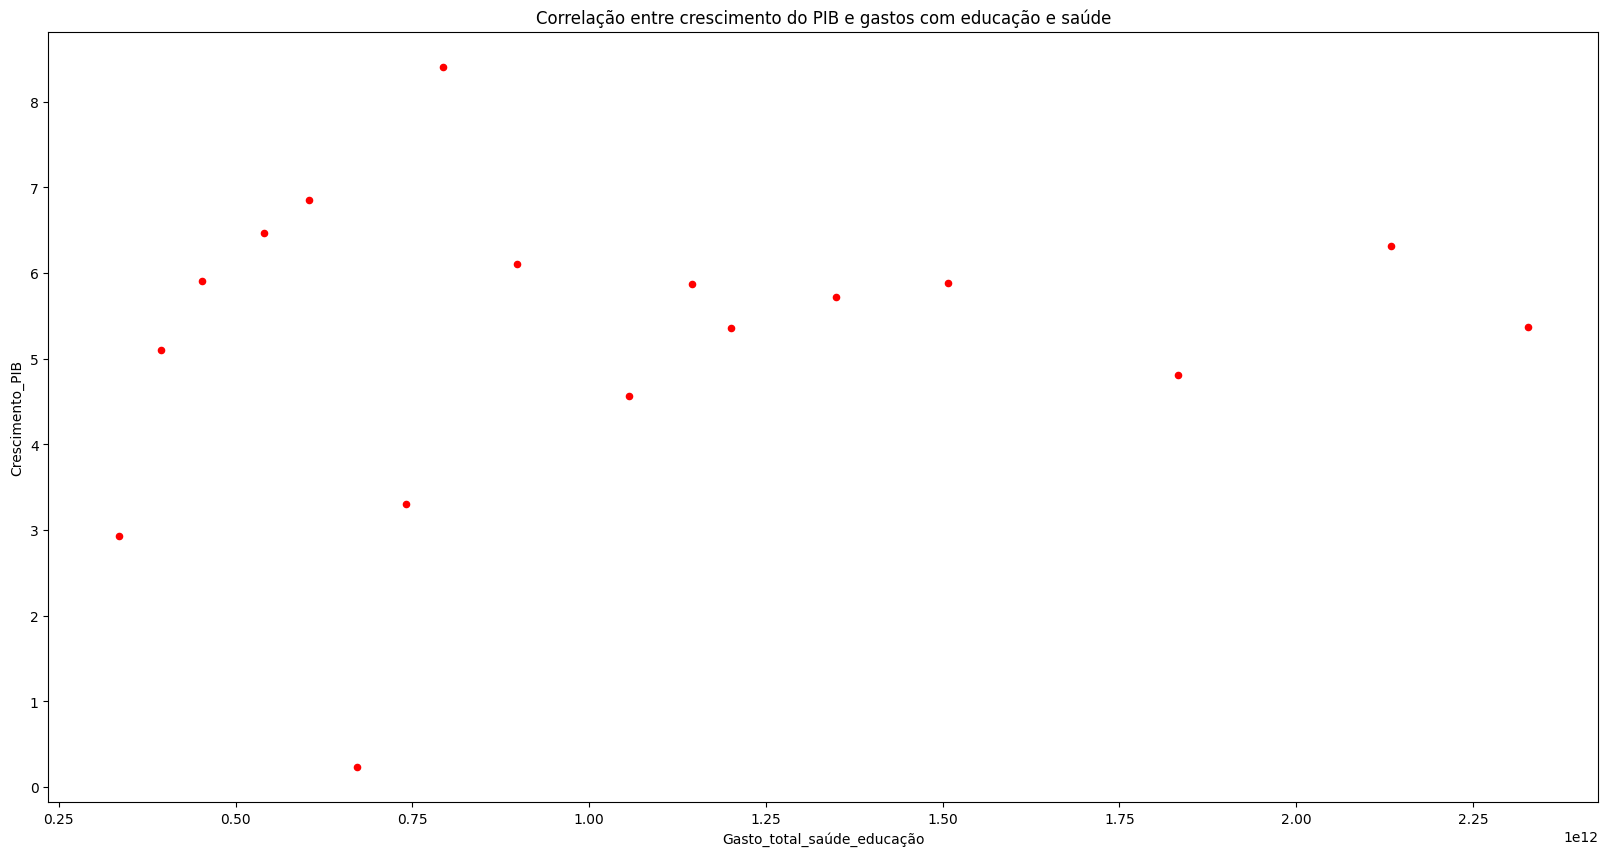

In [94]:
df.plot(x='gastos_saude_educ', y='pib_cresc_anual%', kind = 'scatter', figsize = (20,10), color = 'red', style = 'O')
plt.xlabel('Gasto_total_saúde_educação')
plt.ylabel('Crescimento_PIB')
plt.title('Correlação entre crescimento do PIB e gastos com educação e saúde')
plt.show()

In [95]:
#Construindo um modelo de regreção
#Prepara X e Y
x = pd.DataFrame(df['gastos_saude_educ'])
y = pd.DataFrame(df['pib_cresc_anual%'])

#Cria o modelo de regração linear
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

In [97]:
#Extraindo o coeficiente
modelo.coef_

array([[5.20791642e-13]])

### Os resultados sugerem que os gastos com educação e saúde afetam positivamente o PIB.
### O aumento unitário nas despesas do governo leva a um aumento unitário de 5.20791642e-13 no crescimento do PIB. OBS: O valor é muito pequeno, observe a notação cientifica de -13.

# Fim